In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [2]:
pip install rake_nltk

     |████████████████████████████████| 1.5MB 29.2MB/s eta 0:00:01
  ERROR: Complete output from command /home/jupyterlab/conda/envs/python/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-l_9jleqa/rake-nltk/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-_c2jpj_t --python-tag cp36:
  ERROR: running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/rake_nltk
  copying rake_nltk/__init__.py -> build/lib/rake_nltk
  copying rake_nltk/__version__.py -> build/lib/rake_nltk
  copying rake_nltk/rake.py -> build/lib/rake_nltk
  installing to build/bdist.linux-x86_64/wheel
  running install
  running install_lib
  creating build/bdist.linux-x86_64
  creating build/bdist.linux-x86_64/wheel
  creating build/bdist.linux-x86_64/wheel/rake_nltk
  copying build/l

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1.columns = ['id','title','cast','crew']

In [5]:
df1

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [6]:
df2 = df2.merge(df1,on = 'id')

In [7]:
df2.head()
df3 = df2

In [8]:
C = df2['vote_average'].mean() # the mean vote across each report
C

6.092171559442016

In [9]:
#m the minimum votes required to be listed in the chart
m = df2['vote_count'].quantile(0.9) # this means 90 percent of people are less than this number
# for the movie to be listed in the demographic chart the movie should have more votes than atleast 90 percent of the movies in the list
m

1838.4000000000015

In [10]:
# now lets filter out the movies that qualify for the count chart
qualified_movies = df2[df2['vote_count'] > m] # in this case we get only 481 movies who qualify for the top chart
# now we will apply the formula which will help us in finding the best movies from the list


In [11]:
v = qualified_movies.iloc[0,:]['vote_count']

In [12]:
 R = qualified_movies.iloc[0,:]['vote_average']

In [13]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [14]:
C = df2['vote_average'].mean()
m = df2['vote_count'].quantile(0.9)
filtered_movies = df2[df2['vote_count'] > m]

In [15]:
def finding_score(R = 0,v = 0):
    return (v/(v+m) * R) + (m/(m+v) * C)

In [16]:
array = []
for index,row in filtered_movies.iterrows():
    v = row['vote_count']
    R = row['vote_average']
    score = finding_score(R = R,v = v)
    array.append((index,score))

In [17]:
scores = pd.DataFrame(array)

In [18]:
filtered_movies['scores'] = scores.set_index(0)

# method 2

In [19]:
def weighted_rating(x,m = m,C = C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [20]:
filtered_movies['scores'] = filtered_movies.apply(lambda x : weighted_rating(x),axis = 1)

In [21]:
filtered_movies = filtered_movies[['title_x','vote_count','vote_average','scores']]

In [22]:
filtered_movies.sort_values(by = 'scores',ascending = False)[:15]

,title_x,vote_count,vote_average,scores
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


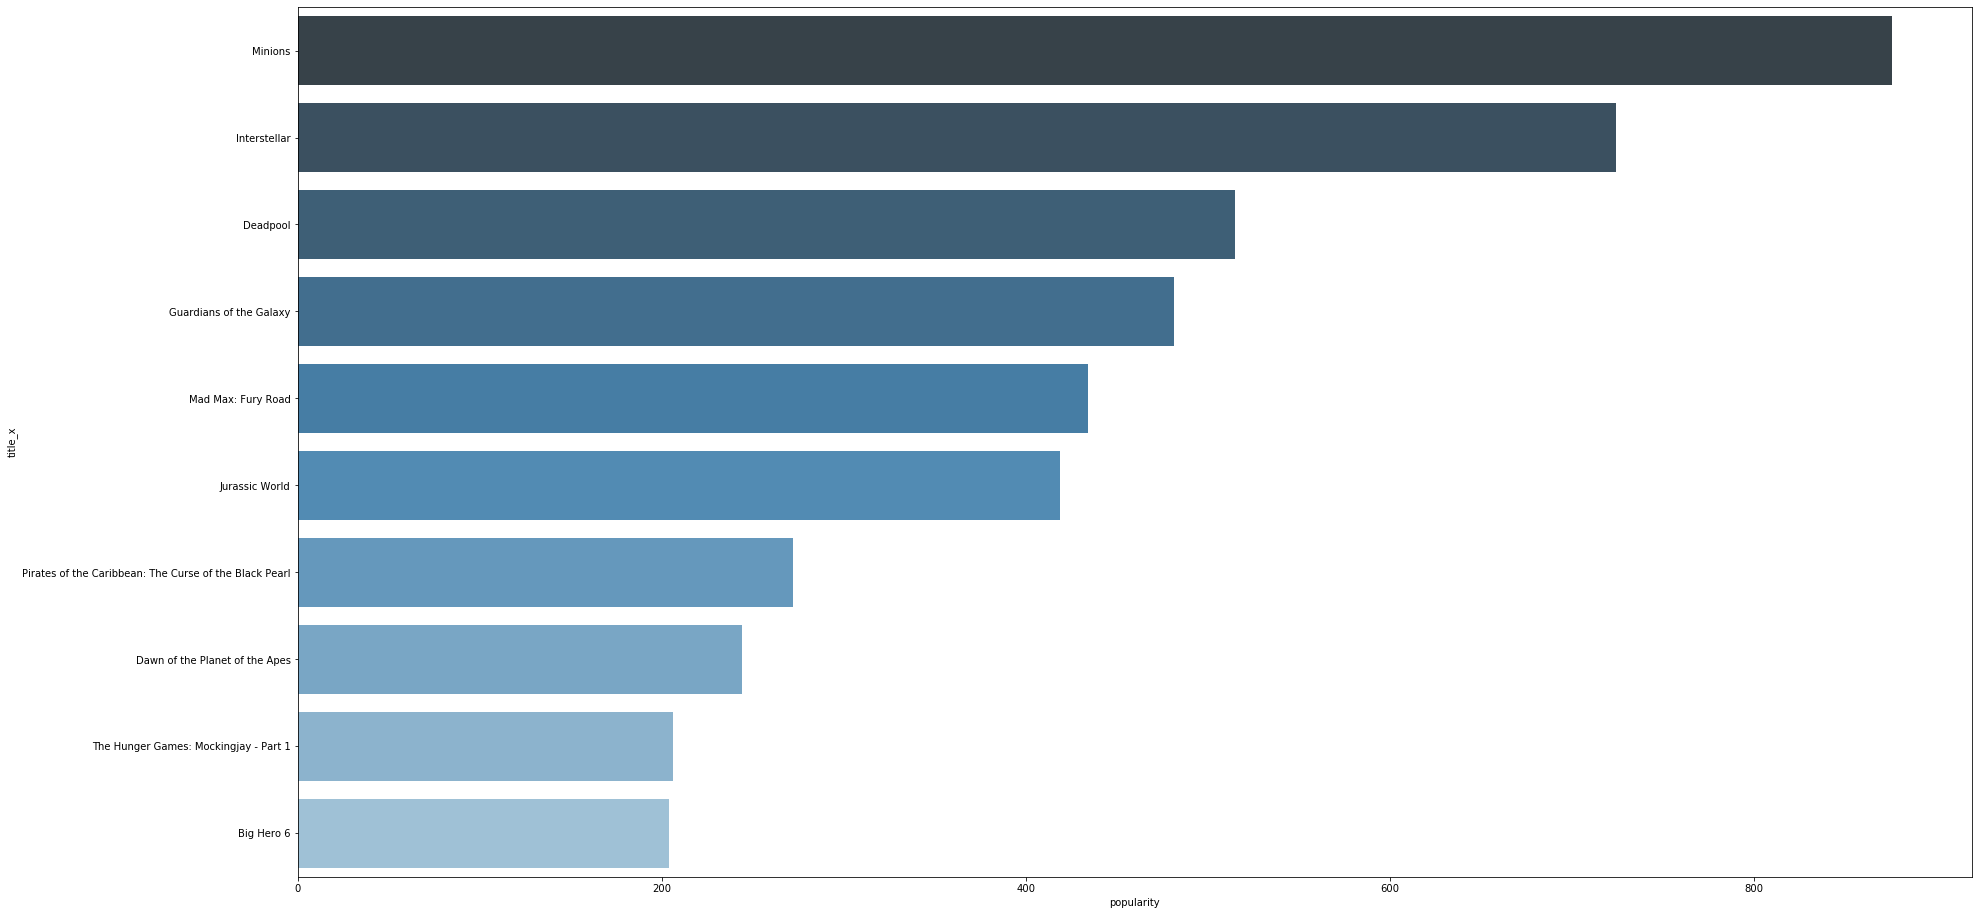

In [23]:
data = df2[['title_x','popularity']].sort_values(by = 'popularity',ascending = False)[:10]
plt.figure(figsize = (30,16))
sns.barplot(data = data,y = 'title_x',x = 'popularity',palette="Blues_d")

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

In [25]:
df2['overview'] = df2['overview'].fillna(' ')

In [26]:
from rake_nltk import Rake

df2['key_words'] = ''
for index,row in df2.iterrows():
    plot = row['overview']
    r = Rake()
    r.extract_keywords_from_text(plot)
    key_word_score_in_dict = r.get_word_degrees()
    row['key_words'] = list(key_word_score_in_dict)

In [ ]:
from rake_nltk import Rake
df2['key_words'] = ' '
for index,row in df2.iterrows():
    overview = row['overview']
    r = Rake()
    r.extract_keywords_from_text(overview)
    key_word_score_in_dict = r.get_word_degrees()
    row['key_words'] = list(key_word_score_in_dict)
    


In [ ]:
def extract_keywords(text):
    r = Rake()
    r.extract_keywords_from_text(text)
    return list(r.get_word_degrees())
df2['keywords'] = df2['overview'].apply(lambda x : extract_keywords(x))

In [ ]:
df2['genres']

In [ ]:
from ast import literal_eval
df2['genres'] = df2['genres'].apply(literal_eval)
df2['genres'].apply(lambda x : [i['name'] for i in x])

In [ ]:
a = df2['genres'].apply(lambda x : [i['name'] for i in x])

In [ ]:
df2['genres'] = a

In [ ]:
from ast import literal_eval
df2['cast'] = df2['cast'].apply(literal_eval)

In [ ]:
df2['cast'] = df2['cast'].apply(lambda x :[i['name'] for i in x[:5]])

In [ ]:
df2['cast'] = df2['cast'].apply(lambda x : [word.lower().replace(' ','') for word in x])

In [ ]:
df2 = df2[['keywords','cast','genres']]

In [ ]:
columns = list(df2.columns)

In [ ]:
df2['bag_of_words'] = ' '
for index,row in df2.iterrows():
    words = ' '
    for col in columns:
        words = words + ' '.join(row[col]) + ' '
    row['bag_of_words'] = words
    
    

In [ ]:
df2['bag_of_words'][0]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
matrix = tfidf.fit_transform(df2['bag_of_words'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_matrix = cosine_similarity(matrix,matrix)

In [ ]:
indices = pd.Series(df3.index, index=df3['title_x']).drop_duplicates()

In [ ]:
indices

In [ ]:
title = 'Rush Hour 3'
recommended_movies = []
idx = indices[title]
score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
top_10_index = list(score_series.iloc[1:11].index)
for i in top_10_index:
    recommended_movies.append((df3['title_x'][i]))

In [ ]:
recommended_movies